<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Missing Values**


Estimated time needed: **30** minutes


Data wrangling is the process of cleaning, transforming, and organizing data to make it suitable for analysis. Finding and handling missing values is a crucial step in this process to ensure data accuracy and completeness. In this lab, you will focus exclusively on identifying and handling missing values in the dataset.


## Objectives


After completing this lab, you will be able to:


-   Identify missing values in the dataset.

- Quantify missing values for specific columns.

- Impute missing values using various strategies.


## Hands on Lab


##### Setup: Install Required Libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 143.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 145.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 80.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 108.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 155.9 MB/s eta 0:00:00


##### Import Necessary Modules:


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Tasks


<h2>1. Load the Dataset</h2>
<p>
We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:



In [4]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### 2. Explore the Dataset
##### Task 1: Display basic information and summary statistics of the dataset.


In [11]:
## Write your code here
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


,count,mean,std,min,25%,50%,75%,max
ResponseId,65437.0,3.271900e+04,1.889018e+04,1.0,16360.0,32719.0,49078.0,6.543700e+04
CompTotal,33740.0,2.963841e+145,5.444117e+147,0.0,60000.0,110000.0,250000.0,1.000000e+150
WorkExp,29658.0,1.146696e+01,9.168709e+00,0.0,4.0,9.0,16.0,5.000000e+01
JobSatPoints_1,29324.0,1.858109e+01,2.596622e+01,0.0,0.0,10.0,22.0,1.000000e+02
JobSatPoints_4,29393.0,7.522140e+00,1.842266e+01,0.0,0.0,0.0,5.0,1.000000e+02
JobSatPoints_5,29411.0,1.006086e+01,2.183384e+01,0.0,0.0,0.0,10.0,1.000000e+02
JobSatPoints_6,29450.0,2.434323e+01,2.708936e+01,0.0,0.0,20.0,30.0,1.000000e+02
JobSatPoints_7,29448.0,2.296522e+01,2.701774e+01,0.0,0.0,15.0,30.0,1.000000e+02
JobSatPoints_8,29456.0,2.027817e+01,2.610811e+01,0.0,0.0,10.0,25.0,1.000000e+02
JobSatPoints_9,29456.0,1.616943e+01,2.484503e+01,0.0,0.0,5.0,20.0,1.000000e+02


### 3. Finding Missing Values
##### Task 2: Identify missing values for all columns.


In [12]:
## Write your code here
df.isnull().sum()

ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64

##### Task 3: Visualize missing values using a heatmap (Using seaborn library).



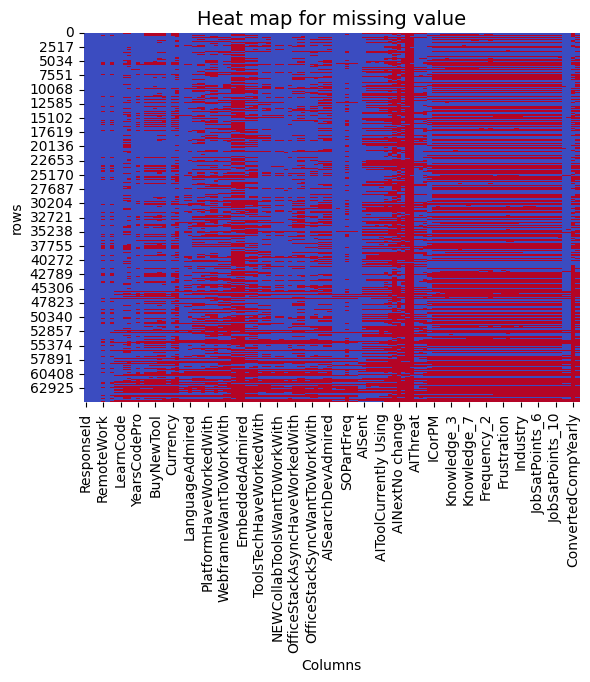

In [14]:
## Write your code here
sns.heatmap(df.isnull(),cbar=False,cmap='coolwarm')
plt.title("Heat map for missing value",fontsize=14)
plt.xlabel("Columns")
plt.ylabel("rows")
plt.show()


##### Task 4: Count the number of missing rows for a specific column (e.g., `Employment`).


In [35]:
## Write your code here

Employment_Missing=df['Employment'].isnull().sum()
print("missing values in Employment column:", Employment_Missing)

missing values in Employment column: 0


### 4. Imputing Missing Values
##### Task 5: Identify the most frequent (majority) value in a specific column (e.g., `Employment`).


In [36]:
## Write your code here
print("Missing values before imputation:", df['Employment'].isnull().sum())
most_frequent_value = df['Employment'].mode()[0]
print("The most frequent (majority) value in 'LearnCode' column is:", most_frequent_value)

Missing values before imputation: 0
The most frequent (majority) value in 'LearnCode' column is: Employed, full-time


##### Task 6: Impute missing values in the `Employment` column with the most frequent value.



In [37]:
## Write your code here
df['Employment'].fillna(most_frequent_value)
print("🔹 Missing values after imputation:", df['Employment'].isnull().sum())

🔹 Missing values after imputation: 0


### 5. Visualizing Imputed Data
##### Task 7: Visualize the distribution of a column after imputation (e.g., `Employment`).


/tmp/ipykernel_374/768252801.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Employment', data=df, palette='viridis')


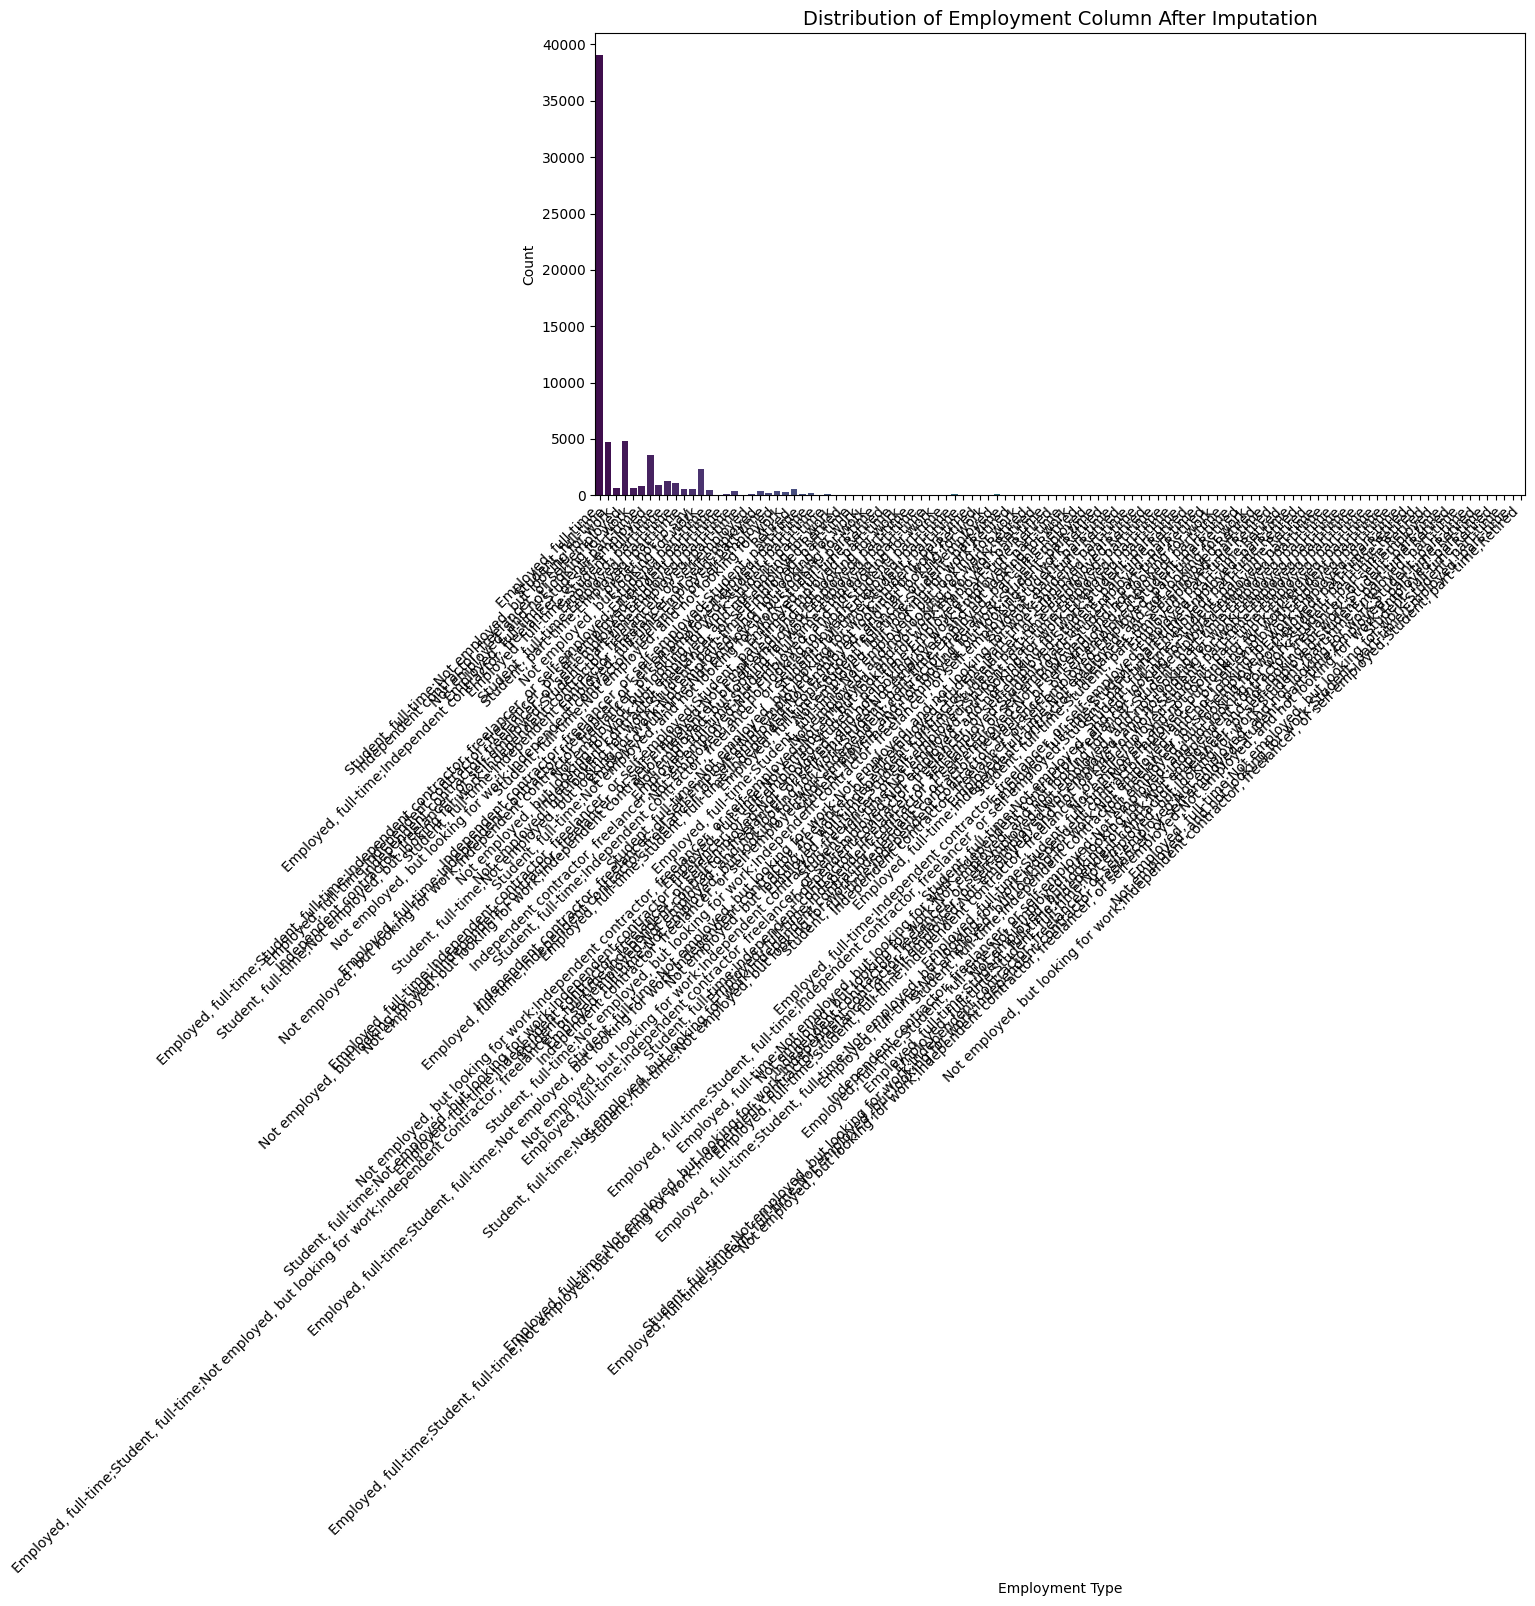

In [38]:
plt.figure(figsize=(12,6))
sns.countplot(x='Employment', data=df, palette='viridis')
plt.xticks(rotation=45, ha='right')  # rotate and align labels
plt.title("Distribution of Employment Column After Imputation", fontsize=14)
plt.xlabel("Employment Type")
plt.ylabel("Count")
plt.show()

### Summary


In this lab, you:
- Loaded the dataset into a pandas DataFrame.
- Identified missing values across all columns.
- Quantified missing values in specific columns.
- Imputed missing values in a categorical column using the most frequent value.
- Visualized the imputed data for better understanding.
  
